## 7days of code - Pandas
---
Desafio apresentado pela Alura para praticar manipulação, visualização e análise de dados com Pandas. 

O objetivo é explorar os dados de empréstimos dos acervos do sistema de bibliotecas da UFRN.

Mais informações no site: [7daysofcode](https://7daysofcode.io/matricula/pandas)

---

### Coletando e concatenando os dados

Foram disponibilidados 21 arquivos csv's que contém dados sobre os empréstimos realizados no Sistema de Bibliotecas da UFRN. Além disso, um arquivo parquet com mais informações sobre os exemplares das bibliotecas.

In [1]:
import pandas as pd
import os

# Define o caminho para o diretório
path = 'dados/dados_emprestimos'

# Listagem todos os arquivos no diretório
files = os.listdir(path)

# Cria uma lista vazia para armazenar os DataFrames
dfs = []

# Loop através de cada arquivo e lê os dados em um DataFrame
for file in files:
    #Verifica se o arquivo é .csv
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
    
        # Lê o arquivo e adiciona ao df
        df = pd.read_csv(file_path)
    
        # Adiciona o DataFrame à lista
        dfs.append(df)

# Concatena todos os DataFrames em um único df
df_emprestimos = pd.concat(dfs).reset_index(drop=True)

df_emprestimos

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
2258013,2989086,2008047044,NaN,2020/05/05 19:51:06.059000000,2021/05/13 14:53:31.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258014,2989087,2008047047,NaN,2020/05/05 19:51:06.135000000,2021/05/13 14:53:38.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258015,2989088,2010052905,NaN,2020/05/05 19:51:06.164000000,2021/05/13 15:01:46.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258016,2989089,2010048023,NaN,2020/06/09 11:54:02.669000000,2021/07/21 15:33:55.000000000,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO


### Verificação de duplicatas

In [2]:
#  Verifica a ocorrência de linhas duplicadas e retorna a quantidade de repetições 
df_emprestimos.value_counts()


id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709704         2006021442     2010/01/17 18:56:43.923000000  2010/01/04 09:58:46.522000000  2010/02/01 13:59:02.528000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709705         2009032168     2010/01/17 18:56:43.909000000  2010/01/04 09:58:46.549000000  2010/01/20 13:14:34.464000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709698         2009047725     2010/01/18 14:44:41.163000000  2010/01/04 09:21:19.099000000  2010/02/02 12:02:38.444000000  2.009047e+09        ALUNO DE GRADUAÇÃO        3
709687         L184117        2010/01/18 11:07:46.470000000  2010/01/04 08:24:21.284000000  2010/02/03 08:58:45.692000000  2.007211e+08        ALUNO DE GRADUAÇÃO        2
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO D

In [3]:
# Exclui as linhas duplicadas
df_emprestimos = df_emprestimos.drop_duplicates()

# Verifica a ocorrência de linhas duplicadas e retorna a quantidade de repetições 
df_emprestimos.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
10322328       2014070441     2018/01/15 12:26:00.697000000  2017/12/29 18:21:09.060000000  2018/01/31 18:50:25.000000000  2.014063e+09        ALUNO DE GRADUAÇÃO        1
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    1
709687         L184117        2010/01/18 11:07:46.470000000  2010/01/04 08:24:21.284000000  2010/02/03 08:58:45.692000000  2.007211e+08        ALUNO DE GRADUAÇÃO        1
709688         2007027500     2010/01/19 15:59:26.464000000  2010/01/04 08:27:33.569000000  2010/02/03 13:06:30.662000000  2.009046e+09        ALUNO DE GRADUAÇÃO        1
709689         L157395        2010/01/19 15:59:26.447000000  2010/01/04 08:27:33.596000000  2010/02/03 13:06:43.125000000  2.009046e+09        ALUNO D

### Importando mais dados

In [4]:
# Importa os dados parquet com mais informações sobre os livros
dados_exemplares = pd.read_parquet('dados/dados_exemplares.parquet')
dados_exemplares

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


### Unindo os dataframes

In [5]:
# Merge do dataset df_emprestimos com o dados_exemplares
df_emprestimos = df_emprestimos.merge(dados_exemplares)

#Exibe as primeiras linhas do dataset mergeado
df_emprestimos.head(5)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,75019
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,44494
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,91736


In [6]:
# Verifica o tamanho do df
df_emprestimos.shape

(2072522, 13)

### Exporando o dataset

In [7]:
# Verifica o tipo dos objetos nas colunas do df
df_emprestimos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           int64  
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           int64  
 12  registro_sistema      int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 205.6+ MB


#### Tratamento das colunas
i - As colunas 'matricula_ou_siape' e 'id_emprestismo' serão transformadas para string.

ii - A coluna 'registro_sistema' será removida.

iii - As colunas com 'data_emprestimo', 'data_devolucao' e 'data_renovacao' serão transformadas para datetime

In [8]:
# Para que um dado float não carregue o valor decimal para a string, primeiro foi feito o preenchimento dos valores NaN com o fillna(0), então transformados para inteiros, e por último transformados para string
df_emprestimos['matricula_ou_siape'] = df_emprestimos['matricula_ou_siape'].fillna(0).astype(int).astype(str)

# A coluna 'id_emprestimo' já é do tipo int, então foi transformada diretamente para string
df_emprestimos['id_emprestimo'] = df_emprestimos['id_emprestimo'].astype(str)

# Remove a coluna 'registro_sistema'
df_emprestimos = df_emprestimos.drop(columns=['registro_sistema'])

#Altera as colunas com datas para o formato datetime
df_emprestimos['data_emprestimo'] = pd.to_datetime(df_emprestimos['data_emprestimo'])
df_emprestimos['data_devolucao'] = pd.to_datetime(df_emprestimos['data_devolucao'])
df_emprestimos['data_renovacao'] = pd.to_datetime(df_emprestimos['data_renovacao'])

# Verifica o tipo dos objetos nas colunas do df
df_emprestimos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         object        
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    object        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
dtypes: datetime64[ns](3), int64(2), object(7)
memory usage: 189.7+ MB


### Atribuir a coluna com nomenclatura da CDU
 
Os itens do acervo em uma biblioteca são organizados por um sistema de classificação de acordo com o respectivo tema. 
Existem diversos sistemas, mas este conjunto está de acordo com a CDU - Classificação Decimal Universal. 
Esta classificação é decimal, pois varia de acordo com a classe de cada assunto:


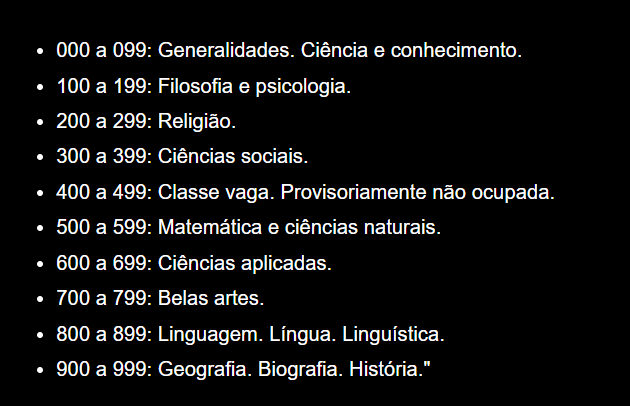

In [9]:
# Cria uma lista para obter a classificação de acordo com a CDU

CDU_lista = []
for CDU in df_emprestimos['localizacao']:
  if(CDU < 100):
    CDU_lista.append('Generalidades')
  elif(CDU < 200):
    CDU_lista.append('Filosofia e psicologia')
  elif(CDU < 300):
    CDU_lista.append('Religião')
  elif(CDU < 400):
    CDU_lista.append('Ciências sociais')
  elif(CDU < 500):
    CDU_lista.append('Classe vaga')
  elif(CDU < 600):
    CDU_lista.append('Matemática e ciências naturais')
  elif(CDU < 700):
    CDU_lista.append('Ciências aplicadas')
  elif(CDU < 800):
    CDU_lista.append('Belas artes')
  elif(CDU < 900):
    CDU_lista.append('Linguagem')
  else:
    CDU_lista.append('Geografia. Biografia. História.')

#Cria uma nova coluna 'CDU_geral' com a lista obtida no passo anterior
df_emprestimos['CDU_geral'] = CDU_lista

df_emprestimos.head(5)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010-01-26 08:07:01.738,2010-01-04 08:08:44.081,2010-02-25 07:36:25.800,2008112114,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010-01-18 11:07:46.470,2010-01-04 08:24:21.284,2010-02-03 08:58:45.692,200721119,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709688,2007027500,2010-01-19 15:59:26.464,2010-01-04 08:27:33.569,2010-02-03 13:06:30.662,2009045971,ALUNO DE GRADUAÇÃO,225646,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686,Ciências aplicadas


In [10]:
df_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         object        
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    object        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
 12  CDU_geral             object        
dtypes: datetime64[ns](3), int64(2), object(8)
memory usage: 205.6+ MB


### Análise exploratória de dados

- Qual a relação entre id_emprestimo e id_exemplar?
- Quantos empréstimos foram realizados ao total?
- Qual é a quantidade total de exemplares emprestados? E por ano?
- Qual a quantidade de exemplares por mês? Quais os meses com mais quantidade de empréstimos realizados?
- Quais os horários com maior quantidade de empréstimo ao longo do dia?

#### Qual a relação entre id_emprestimo e id_exemplar?


In [11]:
df_emprestimos['id_emprestimo'].value_counts()


id_emprestimo
2010326    3
1752337    3
2014596    3
2422542    3
1987946    3
          ..
709732     1
709733     1
709734     1
709735     1
709695     1
Name: count, Length: 2068724, dtype: int64

In [12]:
# Explorando um id_emprestimo
df_emprestimos[df_emprestimos['id_emprestimo'] == '2010326']

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
1141721,2010326,2010082015,NaT,2015-06-02 17:56:18.917,2015-06-19 15:42:51,2010023153,ALUNO DE GRADUAÇÃO,1055921,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,671,Ciências aplicadas
1141722,2010326,2010082015,NaT,2015-06-02 17:56:18.917,2015-06-19 15:42:51,2010023153,ALUNO DE GRADUAÇÃO,1055569,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,699,Ciências aplicadas
1141723,2010326,2010082015,NaT,2015-06-02 17:56:18.917,2015-06-19 15:42:51,2010023153,ALUNO DE GRADUAÇÃO,1056359,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,363,Ciências sociais


Em um único 'id_emprestimo', pode ter sido realizado o emprestimo de mais de exemplar de livro. Dessa forma, para avaliar a quantidade de exemplares total, devem ser consideradas as repetições de 'id_emprestimo'.

#### Quantos empréstimos foram realizados ao total?


In [13]:
emprestimos_unicos = df_emprestimos['id_emprestimo'].nunique()

emprestimos_unicos

2068724

Foram realizados 2068724 emprestimos.

#### Qual é a quantidade total de exemplares emprestados? E por ano?


In [14]:
exemplares_emprestados = df_emprestimos['id_exemplar'].count()

exemplares_emprestados

np.int64(2072522)

Foram emprestados 2072522 exemplares.

#### Qual a distribuição de emprestimos por ano?

In [15]:
# Agrupa os dados por data e conta o número de empréstimos pela data
emprestimos_data = pd.DataFrame(df_emprestimos['data_emprestimo'].value_counts()).reset_index()
emprestimos_data.columns = ['data','quantidade']
emprestimos_data

,data,quantidade
0,2015-06-10 18:51:56.994,3
1,2014-01-28 14:49:50.505,3
2,2014-05-12 09:56:18.787,3
3,2016-04-20 21:07:44.036,3
4,2015-05-05 20:37:19.551,3
...,...,...
2068686,2010-01-04 10:57:59.136,1
2068687,2010-01-04 10:57:59.167,1
2068688,2010-01-04 10:58:54.260,1
2068689,2010-01-04 10:58:54.283,1


In [16]:
# Agrupa por ano e conta o número de empréstimos por ano
emprestimos_ano = emprestimos_data.groupby(emprestimos_data['data'].dt.year)['quantidade'].sum().reset_index()

# Renomeia a coluna
emprestimos_ano.columns = ['ano', 'quantidade']

emprestimos_ano


,ano,quantidade
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189
5,2015,213582
6,2016,215900
7,2017,218462
8,2018,194080
9,2019,171801


In [17]:
emprestimos_ano['quantidade'].sum()

np.int64(2072522)

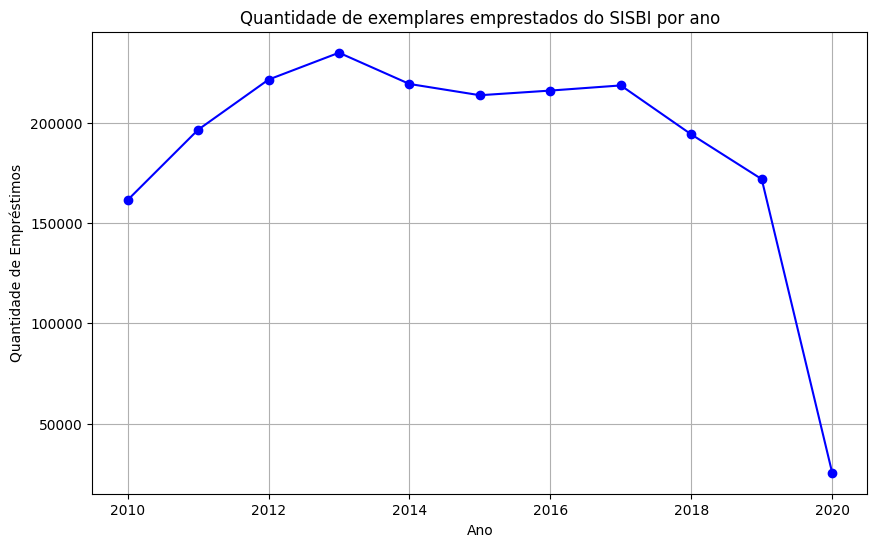

In [18]:
import matplotlib.pyplot as plt

# Cria gráfico de linha para mostrar o número de empréstimos por ano
plt.figure(figsize=(10,6))
plt.plot(emprestimos_ano['ano'], emprestimos_ano['quantidade'], marker='o', color = 'b')

# Adiciona título e rótulos aos eixos
plt.title('Quantidade de exemplares emprestados do SISBI por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Empréstimos')

# Mostra o gráfico
plt.grid(True)
plt.show()


Desde 2013 os números de exemplares emprestados estão diminuindo, com a maior queda ocorrendo de 2019 para 2020.

O ano de 2020 não pode ser avaliado da mesma forma, pois foi o ano que ocorreu a pandemia de COVID-19, onde as pessoas precisaram ficar de quarentena, e com isso, diminuíram as quantidades de empréstimos.

É importante a direção da biblioteca investigar o que está ocorrendo desde 2013 com os procedimentos realizados. 

Alguns questionamentos importantes que devem ser levados para a direção, para que seja poder ser dedobrada em outras análises:

- O número de alunos da universidade vem diminuindo?
- Como está a pesquisa de satisfação dos usuários da biblioteca?
- O acervo está atualizado?
- Quais são as estratégias de marketing que a biblioteca está realizando?
- O que ocorreu de diferente em 2017 em relação a 2016 e 2015 para que o número tenha se elevado?
- E em 2019?

#### Qual a distribuição de emprestimos por mês?

In [19]:
# Agrupa por mes e conta o número de empréstimos por mes
emprestimos_mes = emprestimos_data.groupby(emprestimos_data['data'].dt.month)['quantidade'].sum().reset_index()

# Renomeia a coluna
emprestimos_mes.columns = ['mes', 'quantidade']

emprestimos_mes

,mes,quantidade
0,1,67514
1,2,210200
2,3,252185
3,4,208725
4,5,202530
5,6,138123
6,7,123790
7,8,232793
8,9,208234
9,10,188410


In [20]:
# Para melhorar a leitura dos dados, serão trocados os números pelos nomes dos meses
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

emprestimos_mes['mes'] = emprestimos_mes['mes'].map(dicionario_meses)

emprestimos_mes

,mes,quantidade
0,Jan,67514
1,Fev,210200
2,Mar,252185
3,Abr,208725
4,Mai,202530
5,Jun,138123
6,Jul,123790
7,Ago,232793
8,Set,208234
9,Out,188410


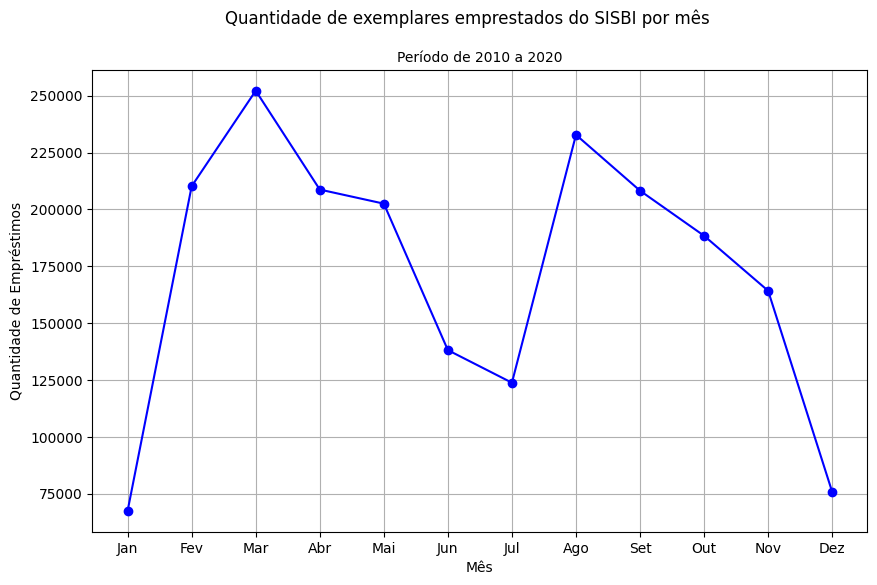

In [21]:
# Cria gráfico de linha para mostrar o número de empréstimos por mês
plt.figure(figsize=(10,6))
plt.plot(emprestimos_mes['mes'], emprestimos_mes['quantidade'], marker='o', color = 'b')

# Adicionar título e subtítulo
plt.title('Período de 2010 a 2020', fontsize=10)
plt.suptitle('Quantidade de exemplares emprestados do SISBI por mês')

# Adicionar rótulos aos eixos
plt.xlabel('Mês')
plt.ylabel('Quantidade de Empréstimos')

# Mostra o gráfico
plt.grid(True)
plt.show()

Pode-se visualizar que os meses com maiores números de exemplares emprestados foram em março e agosto.

Por ser uma biblioteca universitária meses de férias como janeiro, julho e dezembro são os menores números.

O que não é nada de novo, entretanto caso todos os colaboradores saírem de férias durante esse período não conseguiríamos manter todo o funcionamento da biblioteca.

Principalmente com atividades de inventário que podem ocorrer anualmente ou de dois em dois anos e o melhor período seria de dezembro a janeiro.

Então meses como maio, junho, outubro e novembro podem ser uma opção a ser considerada pela direção da biblioteca.

Nota-se também a grande queda no mês de junho. Cabe aqui um alerta para se investigar mais, o que está ocorrendo e desenvolver estratégias e ações de marketing da biblioteca para que se aumente o número de exemplares emprestados.

Como por exemplo: uma ação para que sejam realizados empréstimos de livros para a leitura nas férias de julho.

#### Qual a distribuição de emprestimos por hora do dia?

In [22]:
# Agrupa por hora e conta o número de empréstimos por hora
emprestimos_hora = emprestimos_data.groupby(emprestimos_data['data'].dt.hour)['quantidade'].sum().reset_index()

# Renomeia a coluna
emprestimos_hora.columns = ['hora', 'quantidade']

emprestimos_hora

,hora,quantidade
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


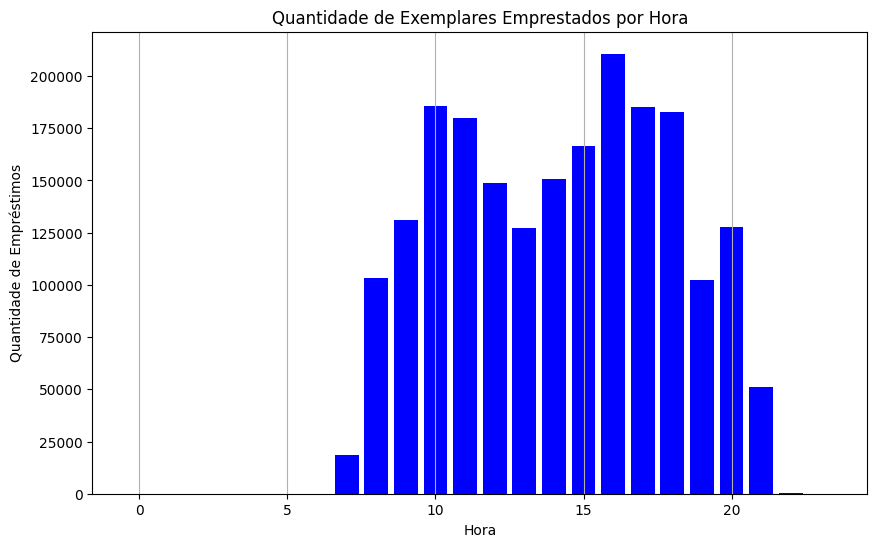

In [23]:
# Criar gráfico de barras para mostrar o número de empréstimos por hora
plt.figure(figsize=(10,6))
plt.bar(emprestimos_hora['hora'], emprestimos_hora['quantidade'], color='b')

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Exemplares Emprestados por Hora')
plt.xlabel('Hora')
plt.ylabel('Quantidade de Empréstimos')

# Mostrar o gráfico
plt.grid(True, axis='x')  # Adicionar grid apenas no eixo y
plt.show()


Através do gráfico é possível identificar que os períodos das 10 h e 16 h são os de maior pico no atendimento de empréstimos.

Períodos do começo da manhã (entre 7h e 9) e da noite (entre 19h e 22) podem ser os melhores horários para que se realizem as demais atividades além do atendimento.

#### Análise exploratória de dados e Variáveis Categóricas

- Quais são as variáveis categóricas no dataset?
- Como se distribuem os empréstimos de exemplares pelos tipos de vínculos dos usuários?
- Quais coleções são as mais emprestadas?
- Quais são as bibliotecas com mais ou menos quantidades de empréstimos?
- Quais os temas de CDU com mais exemplares emprestados?


#### Quais são as variáveis categóricas no dataset?

In [24]:
df_emprestimos.tipo_vinculo_usuario.unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'SERVIDOR TÉCNICO-ADMINISTRATIVO', 'DOCENTE EXTERNO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO', 'OUTROS'], dtype=object)

In [25]:
df_emprestimos.biblioteca.unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [26]:
df_emprestimos.colecao.unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [27]:
df_emprestimos.CDU_geral.unique()

array(['Ciências aplicadas', 'Linguagem', 'Ciências sociais',
       'Geografia. Biografia. História.',
       'Matemática e ciências naturais', 'Religião', 'Generalidades',
       'Filosofia e psicologia', 'Belas artes'], dtype=object)

Para as análises propostas, será criada uma função que irá calcular a porcentagem que representa a variável categórica em relação ao seu total.

In [28]:
def tabela_frequencia(variavel):
    '''
    Esta função irá gerar uma tabela de frequência com percentuais de acordo com a variável passada.

    variavel = variável categórica escolhida de dentro do conjunto de dados 

    '''
    # Gerar a tabela de frequência
    dataframe = pd.DataFrame(df_emprestimos[variavel].value_counts()).reset_index()
    
    # Renomear as colunas
    dataframe.columns = [variavel, 'quantidade']
    
    # Adicionar a coluna de percentuais
    dataframe['percentual'] = round((dataframe['quantidade'] / dataframe['quantidade'].sum()) * 100, 1)

    return dataframe


#### Quantos foram por tipo de vinculo do usuario ?


In [29]:
tipo_vinculo = tabela_frequencia('tipo_vinculo_usuario')

tipo_vinculo

,tipo_vinculo_usuario,quantidade,percentual
0,ALUNO DE GRADUAÇÃO,1612324,77.8
1,ALUNO DE PÓS-GRADUAÇÃO,302541,14.6
2,DOCENTE,70981,3.4
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.6
4,ALUNO MÉDIO/TÉCNICO,28029,1.4
5,DOCENTE EXTERNO,23949,1.2
6,USUÁRIO EXTERNO,2509,0.1
7,OUTROS,5,0.0


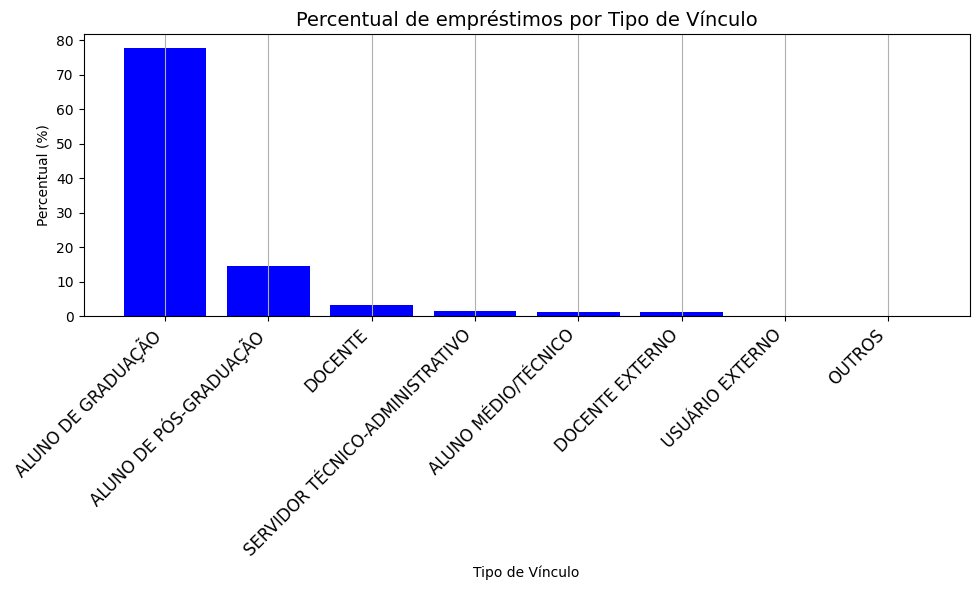

In [30]:
# Criar gráfico de barras para Percentual vs Tipo de Vínculo
plt.figure(figsize=(10,6))
plt.bar(tipo_vinculo['tipo_vinculo_usuario'], tipo_vinculo['percentual'], color='b')

# Adicionar título e rótulos
plt.title('Percentual de empréstimos por Tipo de Vínculo', fontsize=14)
plt.xlabel('Tipo de Vínculo')
plt.ylabel('Percentual (%)')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize= 12)

#plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80])

# Exibir a grade no eixo x
plt.grid(axis='x')

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para não cortar o texto
plt.show()


O maior público da biblioteca são de fato os alunos de graduação com aproxidamente 78% o segundo maior público é o de pós graduação com aproximadamente 15%.

Vale lembrar que esta é apenas uma métrica geral a partir dos exemplares emprestados.

Possilvemente a maior diferença entre os percentuais dos dois anteriores é devido a dois pontos:

Alunos de pós graduação, tem o maior enfoque em artigos científicos que são acessados através de bases de dados bibliográficas.
A maior quantidade de alunos de graduação em comparação com os da pós na universidade.

#### Quantos foram por tipo de coleção ?


In [31]:
tipo_colecao = tabela_frequencia('colecao')

tipo_colecao

,colecao,quantidade,percentual
0,Acervo Circulante,2053120,99.1
1,Multimeios,7954,0.4
2,Monografias,4021,0.2
3,Dissertações,2406,0.1
4,Obras de Referência,1954,0.1
5,Publicações de Autores do RN,866,0.0
6,Publicações da UFRN,764,0.0
7,Teses,714,0.0
8,Folhetos,271,0.0
9,Necessidades Educacionais Específicas,130,0.0


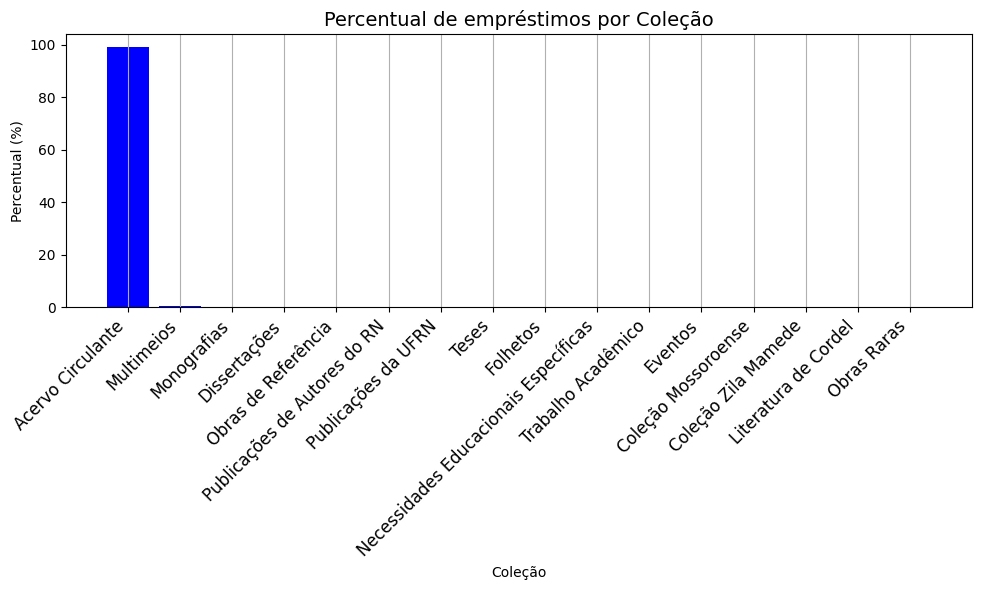

In [32]:
# Criar gráfico de barras para Percentual vs Tipo de Vínculo
plt.figure(figsize=(10,6))
plt.bar(tipo_colecao['colecao'], tipo_colecao['percentual'], color='b')

# Adicionar título e rótulos
plt.title('Percentual de empréstimos por Coleção', fontsize=14)
plt.xlabel('Coleção')
plt.ylabel('Percentual (%)')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize = 12)

# Exibir a grade no eixo x
plt.grid(axis='x')

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para não cortar o texto
plt.show()

A principal coleção é a própria circulante o que se cria um alerta, pois está com 99% de todos os exemplares empréstados.

Principalmente para as monografias, dissertações e teses que poderiam estar sendo mais consultadas para que haja um crescimento das discussões de pesquisa interna da instituição.

Entretanto é importante verificar se esses documentos não estão disponíveis na coleção online e por este motivo não é emprestada fisicamente.

As coleções: Coleção Mossoroense, Coleção Zila Mamede, Literatura de Cordel, Obras Raras devem ter uma atenção especial em entender a razão que estão com números tão pequenos de frequência.

#### Quantos foram por tipo de biblioteca?


In [33]:
biblioteca = tabela_frequencia('biblioteca')

biblioteca

,biblioteca,quantidade,percentual
0,Biblioteca Central Zila Mamede,1426122,68.8
1,Biblioteca Setorial do Centro Ciências da Saúd...,118614,5.7
2,Biblioteca Setorial da Faculdade de Ciências d...,77609,3.7
3,Biblioteca Setorial Prof. Alberto Moreira Camp...,66447,3.2
4,Biblioteca Setorial Profª. Maria Lúcia da Cost...,61478,3.0
5,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,46040,2.2
6,Biblioteca Setorial do Centro de Ciências Huma...,40744,2.0
7,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,32097,1.5
8,Biblioteca Setorial Profª. Maria José Mamede G...,29089,1.4
9,Biblioteca Setorial Prof. Rodolfo Helinski - E...,27219,1.3


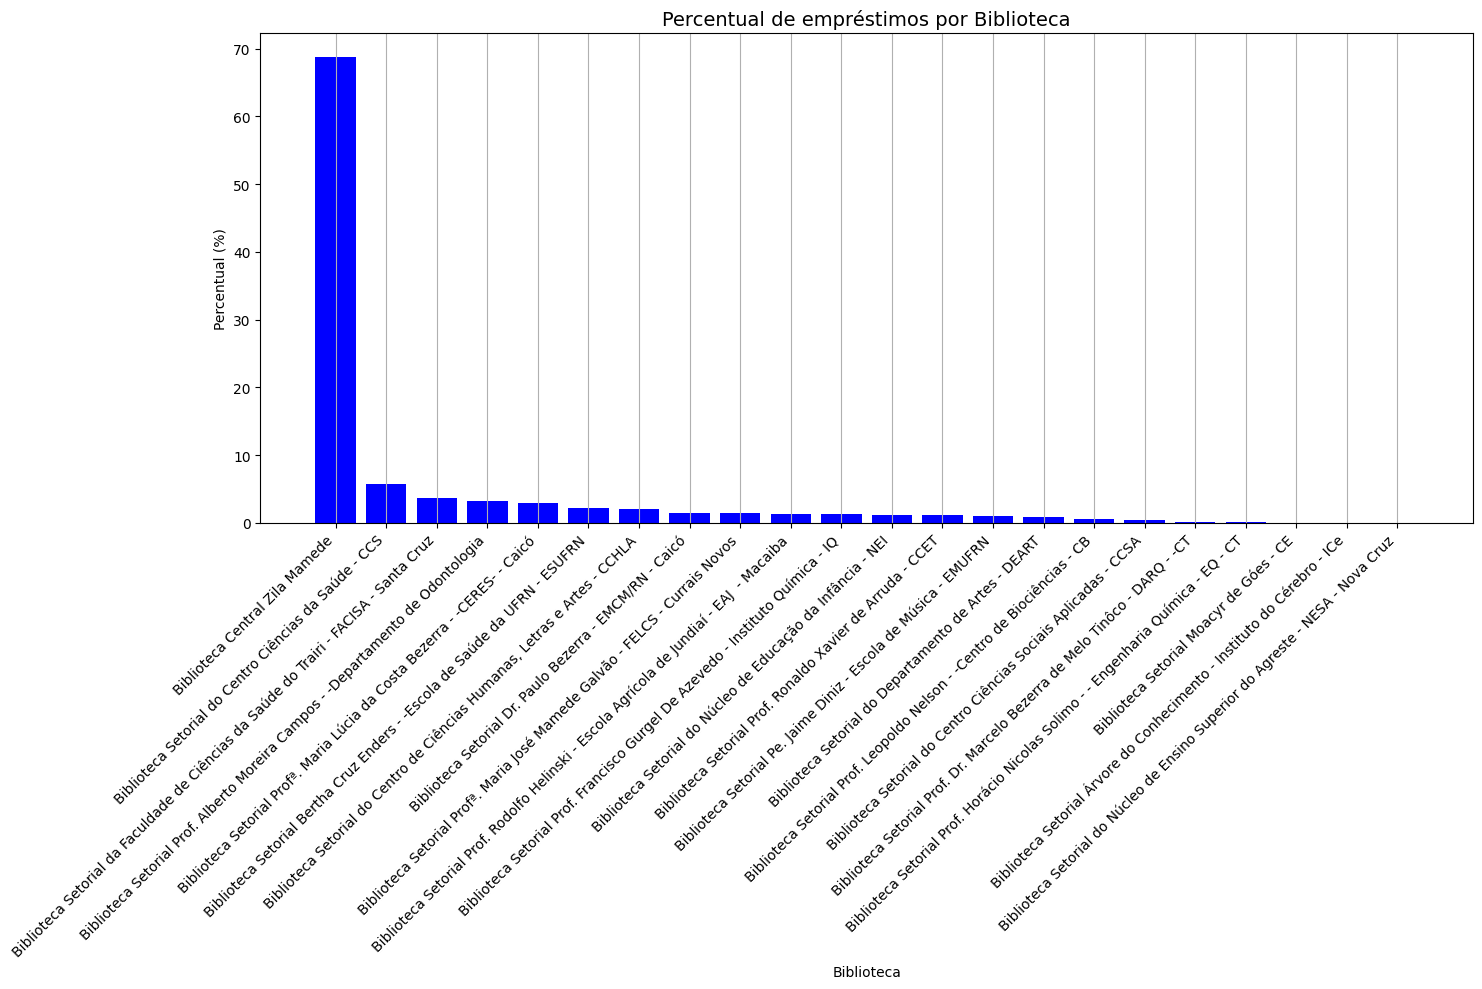

In [34]:
# Criar gráfico de barras para Percentual vs Tipo de Vínculo
plt.figure(figsize=(15,10))
plt.bar(biblioteca['biblioteca'], biblioteca['percentual'], color='b')

# Adicionar título e rótulos
plt.title('Percentual de empréstimos por Biblioteca', fontsize=14)
plt.xlabel('Biblioteca')
plt.ylabel('Percentual (%)')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize = 10)

# Exibir a grade no eixo y
plt.grid(axis='x')

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para não cortar o texto
plt.show()

Pelo tamanho da biblioteca central era de se esperar que houvesse uma maior predominância dela.

Este ranking é importante para se entender o contexto geral do sistema de bibliotecas, entretanto para que se enriqueça ainda mais essa análise se faz necessário uma avaliação interna de outras métricas, como:

A quantidade esperada de empréstimos.
Quantidade de empréstimos por usuário cadastrado em cada biblioteca.
Ações e investimentos realizados em cada uma.

#### Quantos foram por tipo de CDU?


In [35]:
CDU_geral = tabela_frequencia('CDU_geral')

CDU_geral

,CDU_geral,quantidade,percentual
0,Ciências aplicadas,1425473,68.8
1,Ciências sociais,369536,17.8
2,Matemática e ciências naturais,68744,3.3
3,Generalidades,62521,3.0
4,Religião,62295,3.0
5,Filosofia e psicologia,60563,2.9
6,Geografia. Biografia. História.,7989,0.4
7,Belas artes,7911,0.4
8,Linguagem,7490,0.4


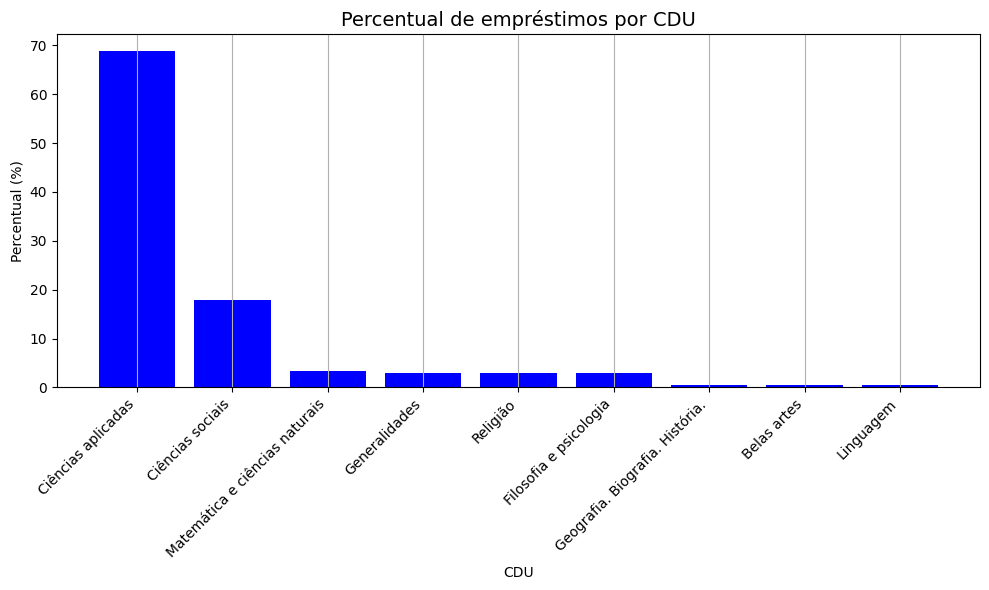

In [36]:
# Criar gráfico de barras para Percentual vs Tipo de Vínculo
plt.figure(figsize=(10,6))
plt.bar(CDU_geral['CDU_geral'], CDU_geral['percentual'], color='b')

# Adicionar título e rótulos
plt.title('Percentual de empréstimos por CDU', fontsize=14)
plt.xlabel('CDU')
plt.ylabel('Percentual (%)')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right', fontsize = 10)

# Exibir a grade no eixo x
plt.grid(axis='x')

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout para não cortar o texto
plt.show()

De maneira geral podemos observar que há uma grande diferença entre os temas.

Será importante entender a razão de materiais do tema de Geografia/Biografia/História, Belas artes e Linguagem estão com números tão baixos.

Algumas questões surgem:

O acervo está atualizado?
O público da biblioteca tem a necessidade destas informações? Se sim, por que não estão usando?
Quais ações de marketing estão sendo realizadas para esses temas?

#### Análise exploratória de dados e BoxPlot

Qual o comportamento dos empréstimos dos livros para os alunos de graduação e pós em relação aos anos? Considerando a coleção com maior frequência de empréstimos pelo tipo de usuário.

##### Alunos de Graduação

In [37]:
alunos_graduacao = df_emprestimos.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
alunos_graduacao.colecao.value_counts()

colecao
Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: count, dtype: int64

##### Tabela com a quantidade mensal de empréstimos por anos

In [38]:
alunos_graduacao_acervo_circulante = alunos_graduacao.query('colecao == "Acervo Circulante"')
alunos_graduacao_acervo_circulante = pd.DataFrame(alunos_graduacao_acervo_circulante)
alunos_graduacao_acervo_circulante['ano'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_graduacao_acervo_circulante['mes'] = alunos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.loc[:,['ano','mes']]
alunos_graduacao_acervo_circulante = alunos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
alunos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2012,3,22797
1,2015,3,22483
2,2013,4,21853
3,2017,3,21735
4,2016,3,21692
...,...,...,...
118,2016,1,2670
119,2019,1,2276
120,2019,12,1980
121,2020,1,1781


##### Função que gera o gráfico box plot

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def gera_box_plot(dataset, x, y, titulo, subtitulo):
    '''
    Esta função irá gerar um gráfico de boxplot.

    Dataset = conjunto de dados do gráfico
    x = valor do eixo x do gráfico
    y = valor do eixo y do gráfico
    título = título do gráfico
    subtítulo = subtítulo do gráfico
    '''

    sns.set_theme(style="darkgrid", palette='Blues', font_scale=1.3)                    
    plt.figure(figsize=(16,10))                                                           

    ax = sns.boxplot(y=y, x=x, data=dataset, color='#4171EF')                                           
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.')))                

    # Definir o limite do eixo y
    plt.ylim(0, max(dataset[y]) * 1.1)
    plt.xlabel(None)
    plt.ylabel(None)
    
    ax.set_title(titulo + "\n", size=20, loc='left', weight='bold')
    ax.text(s=subtitulo, x=-0.5, y=max(dataset[y]) * 1.11, fontsize=18, ha='left', color='gray')   
    plt.show()


##### Distribuição dos empréstimos mensais realizados por alunos de graduação na coleção do acervo circulante

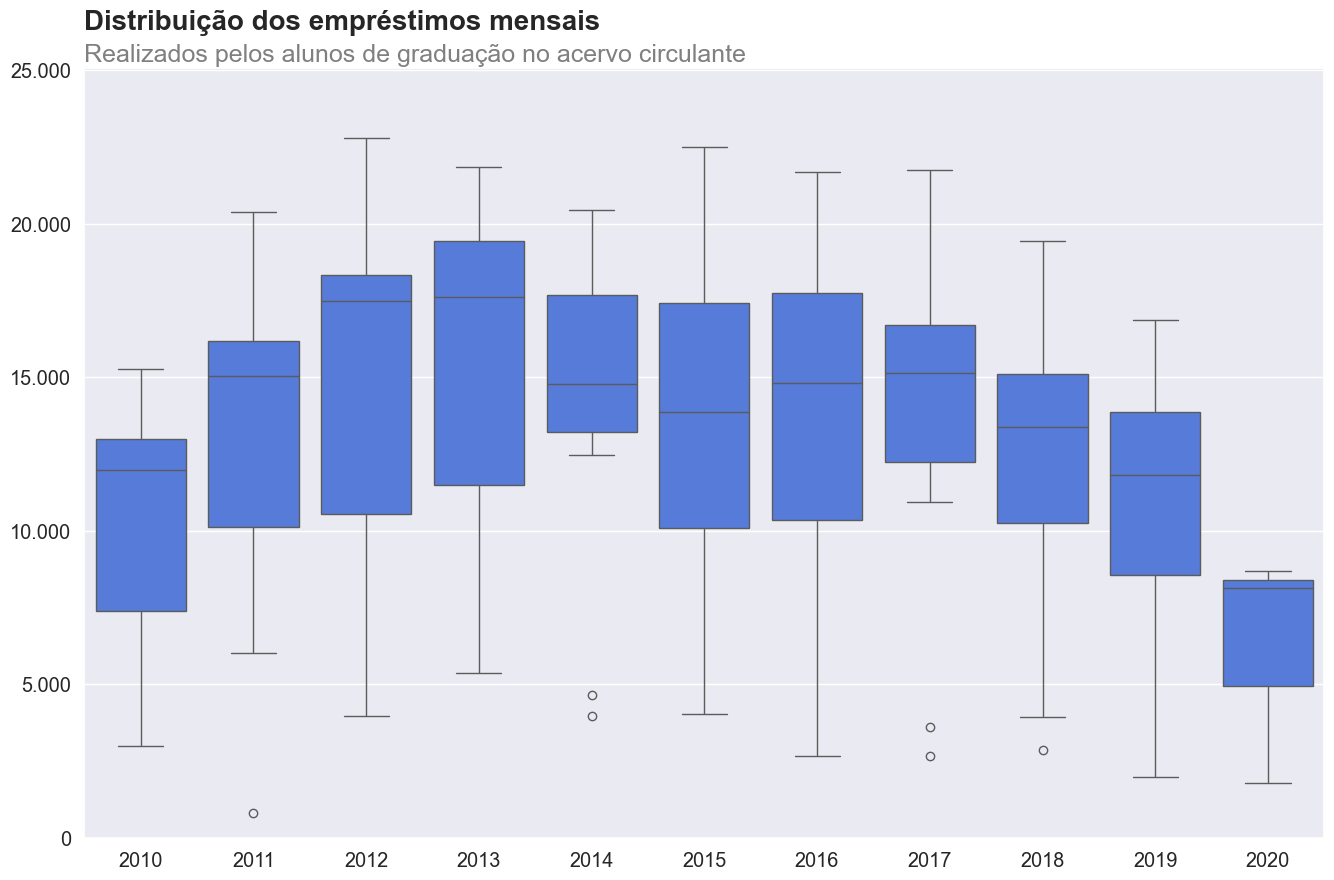

In [40]:
gera_box_plot(alunos_graduacao_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'Realizados pelos alunos de graduação no acervo circulante')

É importante ressaltar que esse recorte, reflete grande parte da estrutura geral do conjunto de dados, pois são os tipos de usuários com maior frequência (alunos de graduação) e da coleção mais utilizada por eles (acervo circulante).

Com o boxplot é possível observar a oscilação da quantidade de empréstimos realizados mensalmente durante cada ano.

Além da análise geral realizada (declínio a partir de 2013, forte baixa em 2019), chama atenção os anos de 2014 e 2017. Que se excluíssemos os outliers (possivelmente meses de janeiro e dezembro) teríamos anos com uma quantidade constante de empréstimos mensais.

Mas se diferenciam principalmente porque em 2014 houve um declínio e em 2017 houve um aumento, em relação aos anos anteriores. Seria interessante entender com a direção das bibliotecas o que ocorreu nessas datas para que pudéssemos ter um contexto melhor da realidade do negócio.

##### Alunos de Pós Graduação

In [41]:
alunos_pos_graduacao = df_emprestimos.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_pos_graduacao.colecao.value_counts()

colecao
Acervo Circulante                        299201
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Trabalho Acadêmico                           23
Coleção Mossoroense                          23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: count, dtype: int64

##### Tabela com a quantidade mensal por ano para os alunos de pós graduação

In [42]:
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao.query('colecao == "Acervo Circulante"')
alunos_pos_graduacao_acervo_circulante = pd.DataFrame(alunos_pos_graduacao_acervo_circulante)
alunos_pos_graduacao_acervo_circulante['data_emprestimo'] = pd.to_datetime(alunos_pos_graduacao_acervo_circulante['data_emprestimo'])
alunos_pos_graduacao_acervo_circulante['ano'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.year
alunos_pos_graduacao_acervo_circulante['mes'] = alunos_pos_graduacao_acervo_circulante['data_emprestimo'].dt.month
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.loc[:,['ano','mes']]
alunos_pos_graduacao_acervo_circulante = alunos_pos_graduacao_acervo_circulante.value_counts().to_frame('quantidade').reset_index()
alunos_pos_graduacao_acervo_circulante

,ano,mes,quantidade
0,2015,3,3927
1,2017,8,3837
2,2017,3,3722
3,2016,3,3711
4,2016,8,3662
...,...,...,...
119,2020,1,1143
120,2010,1,1105
121,2019,12,1069
122,2011,1,465


##### Distribuição dos empréstimos mensais realizados por alunos de pós graduação na coleção do acervo circulante

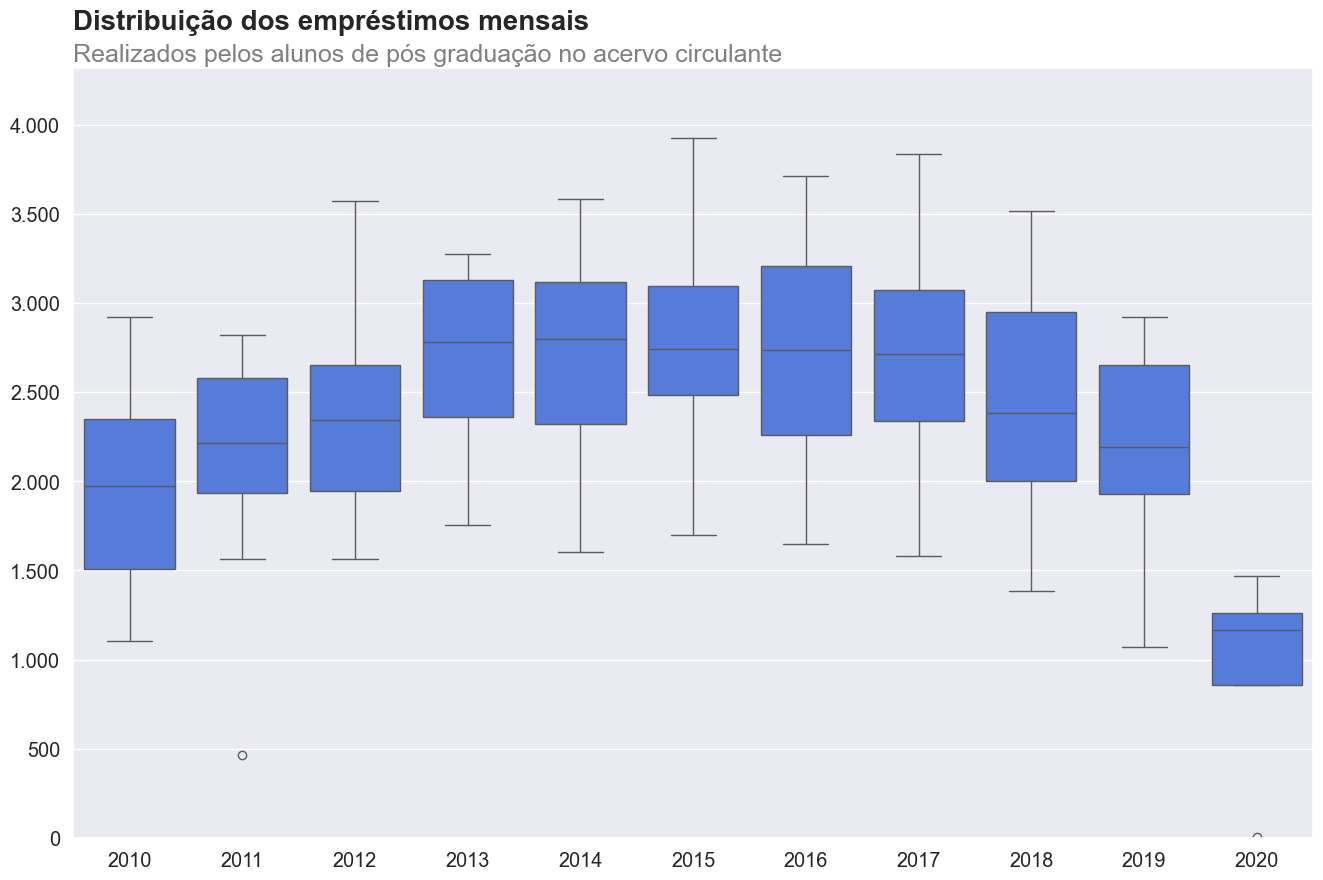

In [43]:
gera_box_plot(alunos_pos_graduacao_acervo_circulante,'ano','quantidade','Distribuição dos empréstimos mensais', 'Realizados pelos alunos de pós graduação no acervo circulante')

Já os alunos de pós graduação tiveram um aspecto diferente em relação ao declínio a partir de 2013:

A linha mediana foi diminuindo devagar até 2018. Entretanto valores máximos foram superiores, apenas caindo de fato em 2019.
Nos dois gráficos podemos observar um grande aumento entre 2010 e 2013, o que nos leva a pensar em quais procedimentos estavam sendo realizados neste período para que houvesse esse crescimento.

Nos dois recortes visualizamos que a partir de 2018 tivemos um forte declínio e é um alerta para que a direção possa entender o que está ocorrendo.

#### Novas informações para a análise

Foram disponibilizados dados sobre os usuários contendo o curso que realizam. Os dados foram disponibilizados em um JSON e outra parte em Excel. 

Será avaliado a quantidade de empréstimos realizados entre 2015 e 2020 dos seguintes cursos:

- Biblioteconomia
- Ciências Sociais
- Comunicação Social
- Direito
- Filosofia
- Pedagogia

### Lendo os arquivos em Excel

Estão separados em duas abas da planilha matricula_alunos.xlxs

In [44]:
cadastro_usuarios_antes_2010 = pd.read_excel('dados/dados_emprestimos/matricula_alunos.xlsx',
                                        sheet_name='Até 2010',skiprows=1)
cadastro_usuarios_depois_2010 = pd.read_excel('dados/dados_emprestimos/matricula_alunos.xlsx',
                                        sheet_name='Após 2010',skiprows=1)

In [45]:
# Atualizando os nomes das colunas
cadastro_usuarios_antes_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']

In [46]:
# # Atualizando os nomes das colunas
cadastro_usuarios_depois_2010.columns= ['matricula_ou_siape','tipo_vinculo_usuario','curso']

#### Concatenando os dataframes

In [47]:
cadastro_usuarios_excel = pd.concat([cadastro_usuarios_antes_2010, cadastro_usuarios_depois_2010], ignore_index=True)
cadastro_usuarios_excel['matricula_ou_siape'] = cadastro_usuarios_excel['matricula_ou_siape'].fillna(0).astype(int).astype(str)

cadastro_usuarios_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    10000 non-null  object
 1   tipo_vinculo_usuario  10000 non-null  object
 2   curso                 10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


### Arquivo JSON


### Lendo o arquivo JSON

In [48]:
cadastro_usuarios_json = pd.read_json('dados/dados_emprestimos/cadastro_alunos.json')
cadastro_usuarios_json

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [49]:
cadastro_usuarios_graduacao_json = pd.read_json(cadastro_usuarios_json.registros[0])

C:\Users\dusat\AppData\Local\Temp\ipykernel_18744\773441504.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cadastro_usuarios_graduacao_json = pd.read_json(cadastro_usuarios_json.registros[0])


In [50]:
cadastro_usuarios_graduacao_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


##### Alterando o tipo de dado da coluna 'matricula_ou_siape'

In [51]:
cadastro_usuarios_graduacao_json['matricula_ou_siape'] = cadastro_usuarios_graduacao_json['matricula_ou_siape'].fillna(0).astype(int).astype(str)
cadastro_usuarios_graduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  object
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


### Concatenenando a base do Excel e JSON

In [52]:
cadastro_usuarios_cursos = pd.concat([cadastro_usuarios_excel,cadastro_usuarios_graduacao_json],ignore_index=True)
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


### Empréstimos dos alunos de graduação de 2015 em diante


In [53]:
matricula_data_de_emprestimo = df_emprestimos.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")
matricula_data_de_emprestimo = matricula_data_de_emprestimo.loc[:,['matricula_ou_siape','data_emprestimo']]
matricula_data_de_emprestimo = matricula_data_de_emprestimo.query('data_emprestimo > 2015')
matricula_data_de_emprestimo = matricula_data_de_emprestimo.reset_index(drop=True)
matricula_data_de_emprestimo

,matricula_ou_siape,data_emprestimo
0,2013021576,2015-01-02 09:16:49.566
1,2014026648,2015-01-02 09:44:42.808
2,2014026648,2015-01-02 09:44:43.127
3,2010049586,2015-01-02 10:11:09.837
4,2014021454,2015-01-02 10:19:38.087
...,...,...
788099,20190154579,2020-03-18 16:26:20.477
788100,20160129109,2020-03-18 16:41:28.500
788101,20160129109,2020-03-18 16:41:28.588
788102,20160129109,2020-03-18 16:41:28.662


### Filtrando os cursos selecionados 

In [54]:
cadastro_usuarios_cursos_selecionados = cadastro_usuarios_cursos.query("curso == ['BIBLIOTECONOMIA','CIÊNCIAS SOCIAIS','COMUNICAÇÃO SOCIAL','DIREITO','FILOSOFIA','PEDAGOGIA']")
cadastro_usuarios_cursos_selecionados

,matricula_ou_siape,tipo_vinculo_usuario,curso
8,200031011,ALUNO DE GRADUAÇÃO,DIREITO
9,200045080,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
15,200115053,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
18,200123382,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
19,200123730,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
72789,20200097481,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72796,20200107087,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


### Unindo o dataset de empréstimos com o de usuários

In [55]:
cadastro_usuarios_cursos_selecionados = matricula_data_de_emprestimo.merge(cadastro_usuarios_cursos_selecionados)
cadastro_usuarios_cursos_selecionados

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,2014021454,2015-01-02 10:19:38.087,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,2013018187,2015-01-02 10:25:40.883,ALUNO DE GRADUAÇÃO,DIREITO
2,2014029499,2015-01-02 12:26:43.571,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
3,2014029499,2015-01-02 12:26:43.840,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
4,2014029499,2015-01-02 12:26:44.750,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
...,...,...,...,...
212833,20200090284,2020-03-17 20:23:54.966,ALUNO DE GRADUAÇÃO,DIREITO
212834,20180113385,2020-03-17 21:20:47.278,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
212835,20190150079,2020-03-18 13:43:53.220,ALUNO DE GRADUAÇÃO,PEDAGOGIA
212836,20190150079,2020-03-18 13:43:53.389,ALUNO DE GRADUAÇÃO,PEDAGOGIA


In [56]:
cadastro_usuarios_cursos_selecionados['data_emprestimo'] = pd.to_datetime(cadastro_usuarios_cursos_selecionados['data_emprestimo'])
cadastro_usuarios_cursos_selecionados

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,2014021454,2015-01-02 10:19:38.087,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,2013018187,2015-01-02 10:25:40.883,ALUNO DE GRADUAÇÃO,DIREITO
2,2014029499,2015-01-02 12:26:43.571,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
3,2014029499,2015-01-02 12:26:43.840,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
4,2014029499,2015-01-02 12:26:44.750,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
...,...,...,...,...
212833,20200090284,2020-03-17 20:23:54.966,ALUNO DE GRADUAÇÃO,DIREITO
212834,20180113385,2020-03-17 21:20:47.278,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
212835,20190150079,2020-03-18 13:43:53.220,ALUNO DE GRADUAÇÃO,PEDAGOGIA
212836,20190150079,2020-03-18 13:43:53.389,ALUNO DE GRADUAÇÃO,PEDAGOGIA


In [57]:
# Extrai apenas o ano das datas
cadastro_usuarios_cursos_selecionados.data_emprestimo = cadastro_usuarios_cursos_selecionados.data_emprestimo.dt.year
# Pega as colunas de 1, 2 e 3 do df e faz a contagem da quantidade de emprestimos
emprestimos_cursos_selecionados = cadastro_usuarios_cursos_selecionados.iloc[:,[1,3]].value_counts().reset_index()
# Renomeia as colunas
emprestimos_cursos_selecionados.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimos_cursos_selecionados

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2017,COMUNICAÇÃO SOCIAL,8253
1,2016,COMUNICAÇÃO SOCIAL,7973
2,2017,DIREITO,7885
3,2015,BIBLIOTECONOMIA,7784
4,2015,DIREITO,7665
5,2016,FILOSOFIA,7576
6,2015,CIÊNCIAS SOCIAIS,7489
7,2017,PEDAGOGIA,7434
8,2017,FILOSOFIA,7389
9,2016,DIREITO,7363


#### Tabela Pivotada

In [58]:

emprestimos_tipo_usuario_curso_pivot = emprestimos_cursos_selecionados.pivot_table(
        index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE_EMPRESTIMOS',
        fill_value = '-',
        aggfunc= sum,
        margins = True,
        margins_name = 'TOTAL',
)
emprestimos_tipo_usuario_curso_pivot

C:\Users\dusat\AppData\Local\Temp\ipykernel_18744\4016683961.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  emprestimos_tipo_usuario_curso_pivot = emprestimos_cursos_selecionados.pivot_table(
C:\Users\dusat\AppData\Local\Temp\ipykernel_18744\4016683961.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  emprestimos_tipo_usuario_curso_pivot = emprestimos_cursos_selecionados.pivot_table(
C:\Users\dusat\AppData\Local\Temp\ipykernel_18744\4016683961.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will

ANO,2015,2016,2017,2018,2019,2020,TOTAL
CURSO,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
TOTAL,44224,44087,45186,39353,34864,5124,212838


#### Previsão de empréstimos para pós graduação

##### Importando cadastro de usuários da pós

In [59]:
cadastro_usuarios_posgraduacao_json = pd.read_json(cadastro_usuarios_json.registros[1])

C:\Users\dusat\AppData\Local\Temp\ipykernel_18744\279755034.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cadastro_usuarios_posgraduacao_json = pd.read_json(cadastro_usuarios_json.registros[1])


In [60]:
cadastro_usuarios_posgraduacao_json

cadastro_usuarios_posgraduacao_json['matricula_ou_siape'] = cadastro_usuarios_posgraduacao_json['matricula_ou_siape'].fillna(0).astype(int).astype(str)

cadastro_usuarios_posgraduacao_json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  object
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: object(3)
memory usage: 455.8+ KB


In [61]:
cadastro_usuarios_cursos = pd.concat([cadastro_usuarios_excel,cadastro_usuarios_posgraduacao_json],ignore_index=True)
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
29435,20201013501,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
29436,20201014062,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
29437,20201017690,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
29438,20201014465,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [62]:
cadastro_usuarios_cursos_pos_graduacao = cadastro_usuarios_posgraduacao_json.query("tipo_vinculo_usuario == 'ALUNO DE PÓS-GRADUAÇÃO'")
cadastro_usuarios_cursos_pos_graduacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


Filtrando empréstimos desde de 2017


In [63]:
matricula_data_de_emprestimo_pos_graduacao = df_emprestimos.loc[:,['matricula_ou_siape','data_emprestimo']]
matricula_data_de_emprestimo_pos_graduacao = matricula_data_de_emprestimo_pos_graduacao.query('data_emprestimo > 2017')
matricula_data_de_emprestimo_pos_graduacao = matricula_data_de_emprestimo_pos_graduacao.reset_index(drop=True)
matricula_data_de_emprestimo_pos_graduacao

,matricula_ou_siape,data_emprestimo
0,2014035816,2017-01-02 08:01:14.113
1,20161011168,2017-01-02 08:29:46.722
2,20161011168,2017-01-02 08:29:46.794
3,20161011168,2017-01-02 08:46:42.991
4,20161011168,2017-01-02 08:46:43.400
...,...,...
609948,3067431,2020-05-05 19:51:06.059
609949,3067431,2020-05-05 19:51:06.135
609950,3067431,2020-05-05 19:51:06.164
609951,20201014993,2020-06-09 11:54:02.669


Unindo DataFrames de cadastro de usuários e de empréstimos


In [64]:
emprestimos_pos_graduacao_desde_2017 = matricula_data_de_emprestimo_pos_graduacao.merge(cadastro_usuarios_cursos_pos_graduacao)
emprestimos_pos_graduacao_desde_2017

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20161011168,2017-01-02 08:29:46.722,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
1,20161011168,2017-01-02 08:29:46.794,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
2,20161011168,2017-01-02 08:46:42.991,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
3,20161011168,2017-01-02 08:46:43.400,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,20161013903,2017-01-02 09:41:45.823,ALUNO DE PÓS-GRADUAÇÃO,DESIGN
...,...,...,...,...
92057,20191017055,2020-03-19 14:41:57.754,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92058,20191017055,2020-03-19 14:42:56.670,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92059,20191017055,2020-03-19 14:43:40.666,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA CIVIL
92060,20201014993,2020-06-09 11:54:02.669,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [65]:
emprestimos_pos_graduacao_desde_2017.data_emprestimo = emprestimos_pos_graduacao_desde_2017.data_emprestimo.dt.year

##### Contando valores de empréstimos


In [66]:
emprestimos_pos_graduacao_desde_2017 = emprestimos_pos_graduacao_desde_2017.iloc[:,[1,3]].value_counts().reset_index()
emprestimos_pos_graduacao_desde_2017.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimos_pos_graduacao_desde_2017.head()

,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2018,CIÊNCIAS ODONTOLÓGICAS,2540
1,2017,ADMINISTRAÇÃO,2538
2,2017,ENGENHARIA DE SOFTWARE,2477
3,2017,CIÊNCIAS DA SAÚDE,2434
4,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415


In [67]:
emprestimos_pos_graduacao_e_curso_pivot = emprestimos_pos_graduacao_desde_2017.pivot_table(
        index = 'CURSO',
        columns = 'ANO',
        values = 'QUANTIDADE_EMPRESTIMOS'
)
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,2538.0,2316.0,1692.0,269.0
ARQUITETURA E URBANISMO,2209.0,1917.0,1818.0,257.0
ARTES CÊNICAS,2115.0,2082.0,1812.0,229.0
BIOINFORMÁTICA,2190.0,1914.0,1825.0,263.0
BIOQUÍMICA,2294.0,1944.0,2057.0,272.0
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316.0,2110.0,2008.0,328.0
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415.0,2365.0,2026.0,303.0
CIÊNCIAS DA SAÚDE,2434.0,1986.0,1825.0,234.0
CIÊNCIAS ODONTOLÓGICAS,2414.0,2540.0,2134.0,352.0


#### Importando dados da previsão
Foi compartilhado um arquivo com a previsão de emrpréstimos para o ano de 2022. E será feita uma com tabela com as comparação a quantidade de empréstimos entre os anos 17/18, 18/19 e 19/22(previsão).

In [68]:
previsao_2022 = pd.read_table('dados/dados_emprestimos/previsao.txt')

previsao_2022


,curso previsao_2022
0,administracao 1905
1,arquitetura_e_urbanismo 1896
2,artes_cenicas 1920
3,bioinformatica 2302
4,bioquimica 2090
5,ciencia_e_engenharia_de_materiais 2010
6,ciencia_tecnologia_e_inovacao 1960
7,ciencias_da_saude 1730
8,ciencias_odontologicas 2405
9,design 1900


In [69]:
previsao_2022 = previsao_2022['curso previsao_2022'].str.split(' ',expand=True)
previsao_2022

,0,1
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [70]:
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,2538.0,2316.0,1692.0,269.0
ARQUITETURA E URBANISMO,2209.0,1917.0,1818.0,257.0
ARTES CÊNICAS,2115.0,2082.0,1812.0,229.0
BIOINFORMÁTICA,2190.0,1914.0,1825.0,263.0
BIOQUÍMICA,2294.0,1944.0,2057.0,272.0
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316.0,2110.0,2008.0,328.0
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415.0,2365.0,2026.0,303.0
CIÊNCIAS DA SAÚDE,2434.0,1986.0,1825.0,234.0
CIÊNCIAS ODONTOLÓGICAS,2414.0,2540.0,2134.0,352.0


#### Unindo as tabelas

In [71]:
previsao_2022.index = emprestimos_pos_graduacao_e_curso_pivot.index
emprestimos_pos_graduacao_e_curso_pivot['2022'] = previsao_2022.iloc[:,1]
emprestimos_pos_graduacao_e_curso_pivot

ANO,2017,2018,2019,2020,2022
CURSO,,,,,
ADMINISTRAÇÃO,2538.0,2316.0,1692.0,269.0,1905
ARQUITETURA E URBANISMO,2209.0,1917.0,1818.0,257.0,1896
ARTES CÊNICAS,2115.0,2082.0,1812.0,229.0,1920
BIOINFORMÁTICA,2190.0,1914.0,1825.0,263.0,2302
BIOQUÍMICA,2294.0,1944.0,2057.0,272.0,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316.0,2110.0,2008.0,328.0,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415.0,2365.0,2026.0,303.0,1960
CIÊNCIAS DA SAÚDE,2434.0,1986.0,1825.0,234.0,1730
CIÊNCIAS ODONTOLÓGICAS,2414.0,2540.0,2134.0,352.0,2405


In [72]:
emprestimos_pos_graduacao_e_curso_pivot['2022'] = emprestimos_pos_graduacao_e_curso_pivot['2022'].astype('int')


##### Função que calcula a diferença percentual da quantidade de empréstimos

In [73]:
def diferenca_percentual_ano_anterior(x,y):
  return round(((x / y * 100) - 100),2)

##### Calculando as dferenças

In [74]:
percentual_2018 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,1],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,0])
percentual_2019 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,2],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,1])
percentual_2022 = diferenca_percentual_ano_anterior(emprestimos_pos_graduacao_e_curso_pivot.iloc[:,3],emprestimos_pos_graduacao_e_curso_pivot.iloc[:,2])
     

#### Criando um dataframe com as diferenças calculadas

In [80]:
percentual = pd.DataFrame({'2017 -> 2018':percentual_2018,
                           '2018 -> 2019':percentual_2019,
                           '2019 -> 2022':percentual_2022})
percentual

,2017 -> 2018,2018 -> 2019,2019 -> 2022
CURSO,,,
ADMINISTRAÇÃO,-8.75,-26.94,-84.10
ARQUITETURA E URBANISMO,-13.22,-5.16,-85.86
ARTES CÊNICAS,-1.56,-12.97,-87.36
BIOINFORMÁTICA,-12.60,-4.65,-85.59
BIOQUÍMICA,-15.26,5.81,-86.78
CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89,-4.83,-83.67
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07,-14.33,-85.04
CIÊNCIAS DA SAÚDE,-18.41,-8.11,-87.18
CIÊNCIAS ODONTOLÓGICAS,5.22,-15.98,-83.51


#### Formatando a tabela

In [81]:

percentual.reset_index(inplace=True)
percentual.columns = percentual.columns.str.capitalize()
percentual.Curso = percentual.Curso.str.capitalize()

percentual

,Curso,2017 -> 2018,2018 -> 2019,2019 -> 2022
0,Administração,-8.75,-26.94,-84.10
1,Arquitetura e urbanismo,-13.22,-5.16,-85.86
2,Artes cênicas,-1.56,-12.97,-87.36
3,Bioinformática,-12.60,-4.65,-85.59
4,Bioquímica,-15.26,5.81,-86.78
5,Ciência e engenharia de materiais,-8.89,-4.83,-83.67
6,"Ciência, tecnologia e inovação",-2.07,-14.33,-85.04
7,Ciências da saúde,-18.41,-8.11,-87.18
8,Ciências odontológicas,5.22,-15.98,-83.51
9,Design,-19.10,0.16,-86.20


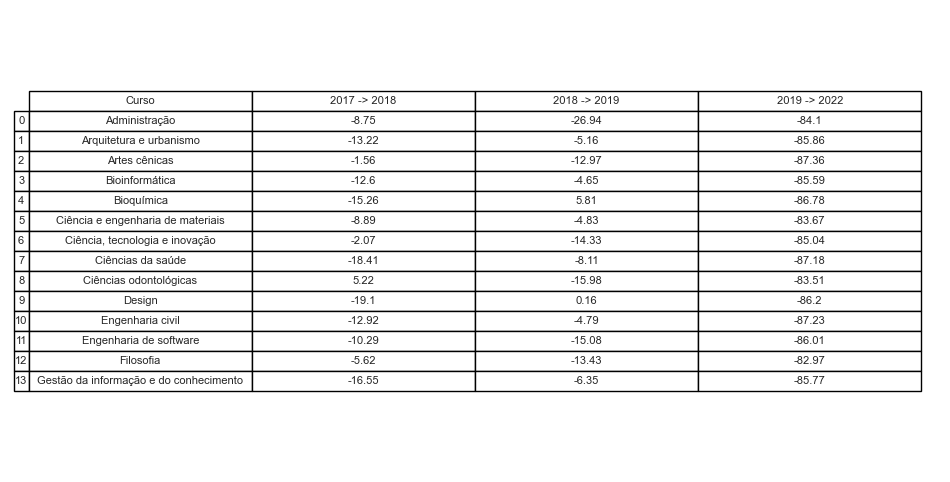

In [82]:
from pandas.plotting import table

# Supondo que seu DataFrame já seja o "percentual"
# percentual = pd.DataFrame(...) # Seu DataFrame já está carregado

# Configurando o tamanho da imagem
fig, ax = plt.subplots(figsize=(12, 6))  # Tamanho ajustado da imagem
ax.axis('tight')
ax.axis('off')

# Gerando a tabela com fonte maior e dados centralizados
tab = table(ax, percentual, loc='center', cellLoc='center', colWidths=[0.2]*len(percentual.columns))
tab.auto_set_font_size(False)  # Desativar ajuste automático de tamanho da fonte
tab.set_fontsize(8)  # Definir o tamanho da fonte (ajuste conforme necessário)
tab.scale(1.2, 1.2)  # Ajustar o tamanho da tabela (ajuste conforme necessário)

# Centralizar os dados
for key, cell in tab.get_celld().items():
    cell.set_text_props(ha='center', va='center')  # Centraliza horizontalmente (ha) e verticalmente (va)

# Salvando a imagem
plt.savefig('tabela_percentual_centralizada.png', bbox_inches='tight', dpi=300)
plt.show()